Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

Name: Adam Ten Hoeve

# Homework 3 

In this assignment:

Part 1 - Theoretical questions regarding bootstrap sampling and random forests.

Part 2- We will implement and analyze a famous algorithm which utillizes **AdaBoost** both for feature selection and as a final model for image classification.

## Environment Setup / Dependencies

This assignment has some additional dependencies beyond what we have used so far:
1. scikit-image, version 0.15.0
2. cifar10_web
3. joblib - used to parallelize for loops

First check if you already have scikit-image installed by running the below import cells. Otherwise:
`conda install scikit-image` or `pip install scikit-image`, and repeat for the other libraries.

Check the scikit-image version in the import cell below. You should have 0.15.0.

# Part 1 : Bootstrapping and Random Forest Questions (4 pts)

For the first part, please answer the following questions **in the cell below**.

In the practical part of this assignment, we will use **boosting**. However there are other algorithms such as [RandomForests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), which also build committees of weak learners and average them for predictions. However, Random Forests rely on a different principle - that of the **bootstrap sample** or **bootstrapping** as well as randomness internal to the base model. 

A bootstrap sampling method as it pertains to machine learning works by training a large number of models each on a subset sample (which actually may be the same size as the original dataset) drawn **with replacement** from the original sample. Each subset sample is of size $M$, which could be up to $N$. These subset samples are called "bootstrap samples". The point is to introduce some variance which allows you to estimate the sample variance of a statistic under consideration. In machine learning, it allows you to reduce correlations between individual models trained on the bootstrap samples. We will analyze this property below. 

As an example, **Random Forests** are one algorithm in this category, and in addition to the randomness from the bootstrap they also have randomness in the features selected at each node of each tree in the comittee or "forest". The default `RandomForestClassifier` model in `scikit-learn` draws a bootstrap sample of the same size as the training dataset passed in the `.fit` function.

Consider collecting a dataset $X$ of size $N$ data points $x_i$ in $\mathbb{R}^k$ for a binary classification problem. Each of these data points also has a label $y_i \in \{0,1\}$:

$$ X = \{ x_i,...,x_N \} $$
$$ Y = \{ y_i, ..., y_N \} $$

Consider also that you have a **base model** of Decision Tree. We would like to train $B$ of these models (B is often very large, such as 1000s). Each model has the form:

$$ T_i : \mathbb{R}^k \rightarrow \{0,1\} $$

We train the models in the following manner:

```
Training:
For each T_i, i=1,....,B:
    (a) Draw a bootstrap sample of size M.
    (b) Train a tree on the bootstrap sample. For each decision of the tree, calculate the best feature split based on a random subset of size p of the full number of features.
    
Output the forest, which is the set of all T_i, i=1,...,B

```

Typical values of $p$ might be $\sqrt{k}$.

Prediction is then done as follows. For a new data point $x$:

$$ \hat{y} =  \sum_{i=1}\frac{1}{B} T_i(b) $$

Answer the following questions **in the cell below**:

1. Consider the models $T_i$ trained above. In boosting, we also train a large set of models $T_i$. Because of the randomness in the training both in boosting and Random Forests, for any data point $x$ we can consider the outputs $T_i(x)$ each as a random variable. A set of random variables with the same possible values is identically distributed if their distributions are the same. Would you expect the $T_i$ in random forests to be identically distributed? What about for the $T_i$ in boosting? Explain why or why not for both. 


2. Would you expect the outputs of the individual $T_i$ to be indpendent after the algorithm above is performed? Why or why not?


3. Suppose your $T_i$ were identically distributed. Then they all have the same mean, $\mu$, and variance $\sigma^2$. In Random Forests, your output is the average given by $\hat{y}$ above, which is another random variable. What is the **expected value** of this random variable? 


4. Now note we did not assume that the variables are independent. Instead, assume all the $T_i$ have a small pairwise correlation coefficient $\rho$. As a reminder, the pairwise correlation coefficient is given by:


$$ \text{corr}[X,Y] = \frac{ \text{cov}(X,Y) }{\sigma_x \sigma_y} $$

And covariance is given by:

$$ \text{cov}[X,Y] = \mathbb{E}[ (X - \mu_x)(Y - \mu_y) ] $$


Prove that the variance of the output $\hat{y}$ is given by:

$$ \text{var}[\hat{y}] = \rho \sigma^2 + \frac{1-\rho}{B} \sigma^2 $$

This in turn shows that as you increase $B$, the variance of the output should decrease down to some minimum value. However, the first term does not decrease, and thus there is an irreducable amount of variance. This is expected since averaging over a large comittee of models has some irreducable variance if all the individual outputs are correlated, even if just slightly. 


**Here are some hints, in order:**

Remember that for a random variable $X$:

$$ \text{var}[X] = \mathbb{E}[ (X- \mathbb{E}[X])^2 ] $$

For a summation of i.i.d. random variables, 

$$ \text{var}[ \frac{1}{N} \sum_{i=1}^N X_i ]= \frac{ \sigma_x }{N}$$

However, the $T_i$ are not $i.i.d$. Instead, you need to expand the square in the first equation to yield a double summation. Then seperate the double summation into $B$ and $B^2-B$ terms, and apply the definition for $\rho$.




1. The $T_i$ in random forest would be independent because each time a new base learner is created, it is not affected by any of the previous learners. In this way, the first and last learners will be doing the same thing, only looking at different random samples of the data. The $T_i$ of boosting are not independent because, after each base learner is trained, the data points are then reweighted based on what that learner got wrong to produce a different classifier on the following iteration. In this way, the $T_{i+1}$ learner is dependent on the $T_i$ learner.
2. The algorithm would have independent $T_i$. It is similar to a random forest in that each base learner is trained on different samples of the data, which is unaffected by any of the previous learners.

3.
$$
\begin{align*}
    E[\hat{y}] &= E \Big[ \sum_{i=1}^B \frac{1}{B} T_i(b) \Big] \\
    &= \frac{1}{B} E \Big[ \sum_{i=1}^B T_i(b) \Big] \\
    &\stackrel{\text{indep}}{=} \frac{1}{B} \sum_{i=1}^B E \Big[ T_i(b) \Big] \\
    &\stackrel{\text{iid}}{=} \frac{1}{B} \sum_{i=1}^B \mu \\
    &= \frac{1}{B} (B\mu) \\
    &= \mu
\end{align*}
$$

4.
$$
\begin{align*}
    \text{var}(\hat{y}) &= E \Big[ \Big( \hat{y} - E[\hat{y}] \Big)^2 \Big] \\
    &= E \Big[ \Big( \frac{1}{B}\sum_{i=1}^B T_i(b) - E[\frac{1}{B}\sum_{i=1}^B T_i(b)] \Big)^2 \Big] \\
    &= E \Big[ \Big( \frac{1}{B}\sum_{i=1}^B T_i(b) - \mu \Big)^2 \Big] \\
    &= E \Big[ \Big( \frac{1}{B}\sum_{i=1}^B \big( T_i(b) - B\mu\big) \Big)^2 \Big] \\
    &= \frac{1}{B^2} E \Big[ \big( \sum_{i=1}^B T_i(b) - \sum_{i=1}^B\mu \big)^2 \Big] \\
    &= \frac{1}{B^2} E \Big[ \big( \sum_{i=1}^B (T_i(b) - \mu) \big)^2 \Big] \\
    &= \frac{1}{B^2} E \Big[ \sum_{i=1}^B \sum_{j=1}^B \Big( T_i(b) - \mu \Big)\Big( T_j(b) - \mu \Big) \Big] \\
    &\stackrel{\text{indep}}{=} \frac{1}{B^2} \sum_{i=1}^B \sum_{j=1}^B \Big( E \Big [\Big( T_i(b) - \mu \Big) \Big( T_j(b) - \mu \Big) \Big] \Big) \\
    &= \frac{1}{B^2} \Big[\sum_{i=j} \big( T_i(b) - \mu \big) \big( T_j(b) - \mu \big) + \sum_{i \ne j} \big( T_i(b) - \mu \big) \big( T_j(b) - \mu \big) \Big] \\
    &= \frac{1}{B^2} \Big[ \sum_{i=j} \text{var}(T_i(b)) + \sum_{i \ne j} \text{covar} \big(T_i(b), T_j(b)\big) \Big] \\
    &= \frac{1}{B^2} \Big[ B \text{var}(T_i(b)) + (B^2 - B) \text{covar} \big(T_i(b), T_j(b)\big) \Big] \\
    &= \frac{1}{B^2} \Big[ B\sigma^2 + (B^2 - B)\rho\sigma^2 \Big] \\
    &= \frac{1}{B^2} \Big[ B\sigma^2 + B^2\rho\sigma^2 - B\rho\sigma^2 \Big] \\
    &= \frac{1}{B}\sigma^2 + \rho\sigma^2 - \frac{1}{B}\rho\sigma^2 \\
    &= \boxed{ \rho\sigma^2 + \frac{1-\rho}{B}\sigma^2 }
\end{align*}
$$

## The Task and Datasets

Our task is to distinguish between images of "faces" and images of things that are not faces.

The dataset(s) we will use are [Cifar10](http://vis-www.cs.umass.edu/fddb/) and the [Labeled Faces in the Wild(LFW)](http://vis-www.cs.umass.edu/lfw/) from UMass to create a "face"/"non-face" dataset.

We only use Cifar10 for making "non-face" examples from the face dataset, since LFW does not have non-face pictures. To combine them together, we cropped and rescaled LFW images to be the same size as Cifar10 (32x32)

We provide two functions below to download the datasets, perform some post-processing, and split the datasets into training/testing sets.

Please do not modify these functions. The first time you run them, they may take a minute because they need to download the data. Expect ~400MB to be downloaded into the folder this notebook resides in.

In [1]:
from cifar10_web import cifar10 
import numpy as np
import time
import random
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

from skimage.data import lfw_subset
from skimage.color import rgb2gray
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
from skimage import feature
import skimage

print(skimage.__version__)

0.15.0


In [2]:
def get_cifar():
    '''
    get_cifar
    
    Returns cifar10 dataset in greyscale
    
    train_images : np.ndarray of size (NumTrain, 32, 32)
    train_labels : np.ndarray of size (NumTrain, )
    
    test_images : np.ndarray of size (NumTest, 32, 32)
    test_labels : np.ndarray of size (NumTest, )
    '''
    train_images, train_labels, test_images, test_labels = cifar10(path="./")
    labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
    labels_map = { idx: label for idx,label in enumerate(labels)}

    # Cifar10 labels are 1-hot encoded. Convert these to numeric labels.
    _, train_labels = np.where(train_labels > 0)
    _, test_labels = np.where(test_labels > 0)
    
    # Convert images to greyscale
    train_images = train_images.reshape((-1,3,32,32)).transpose((0,2,3,1))
    train_images = rgb2gray(train_images)
    test_images = test_images.reshape((-1,3,32,32)).transpose((0,2,3,1))
    test_images = rgb2gray(test_images)
    
    return train_images, test_images, train_labels, test_labels, labels_map

In [3]:
def get_faces_dataset(use_full_lfw=True, num_img=1000):
    '''
    get_faces_dataset
    Returns a subset of the LFW faces dataset in greyscale
    
    Dataset consists of 100 faces and 200 non-face images 
    Dataset is split into 150 train, 50 validation, and 100 test images
    
    Returns: 
    
    datset as dictionary (see below)
    
    '''
    print("Building dataset. This may take a moment. Here is a random face from the LFW datset:")
    lfw_people = fetch_lfw_people(resize=0.25, slice_=(slice(68, 196), slice(68, 196)))
    idx = random.randint(0,13000)
    plt.imshow(lfw_people.images[idx,:,:], cmap=plt.cm.gray)
    plt.show()
    
    # Normalize to within the proper range.
    lfw_people.images = lfw_people.images / 255.0
    
    num_negatives = num_img
    if(not use_full_lfw):
        faces_x = lfw_subset()
        num_img = 100
        num_negatives = 100
        if(num_negatives > 100):
            extra_negatives = np.zeros((num_negatives-100, 25, 25))
            faces_x = np.vstack([faces_x, extra_negatives])
    else:
        print("copying over original LFW images.")
        faces_x = np.zeros((num_img+num_negatives, 32, 32))
        for i in range(num_img):
            faces_x[i, :, :] = lfw_people.images[i, :,:]
    
    # The current negatives are too easy in the subset. Replace with 
    # random cifar images
    faces_y = np.concatenate([np.ones(num_img),np.zeros(num_negatives)])
    trainCX, testCX, trainCY, testCY, cifar_label_map = get_cifar()
    
    faces_negs = (faces_y == 0.0)
    print("copying over negative cifar10 examples")
    for i in range(num_negatives):
        cifarImg = trainCX[i]
        faces_x[num_img+i,:,:] = cifarImg
        
    face_mean = np.mean(faces_x[:num_img])
    non_face_mean = np.mean(faces_x[num_img:])

    
    X_train, X_test, y_train, y_test = train_test_split(faces_x, faces_y, 
                                                        train_size=0.75,
                                                        random_state=0,
                                                        stratify=faces_y)
    
    X_full_train = X_train
    y_full_train = y_train
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                          train_size=0.80,
                                                          random_state=0, 
                                                          stratify=y_train)
    
    label_map = { 0: "non-face", 1: "face"}
    
    dataset = {
        "train": {
            "images": X_train,
            "labels": y_train
        },
        "test": {
            "images": X_test, 
            "labels": y_test
        },
        "valid": {
            "images": X_valid,
            "labels": y_valid
        },
        # FULL TRAIN also conatins the validation data
        # For use after parameter selection, right before evaluating test-set performance.
        "full_train":{ 
            "images": X_full_train,
            "labels": y_full_train
        },
        "label_map": label_map
    }
    
                       
    return dataset

### Dataset Exploration

The `get_faces_dataset` function we created above uses a subset of the LFW faces dataset and combines it with the Cifar10 dataset. The purpose of this is to create a datset with "face" and "not face" images. Otherwise the LFW dataset contains only faces. 

Here we provide some methods for plotting the images and how show you how to use them to visualize 4 randomly selected training images and the labels for those images the faces/Cifar10 dataset.

Building dataset. This may take a moment. Here is a random face from the LFW datset:


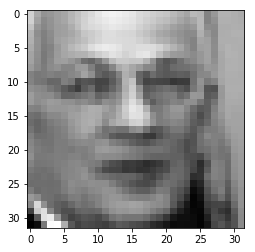

copying over original LFW images.
copying over negative cifar10 examples


In [4]:
dataset = get_faces_dataset()

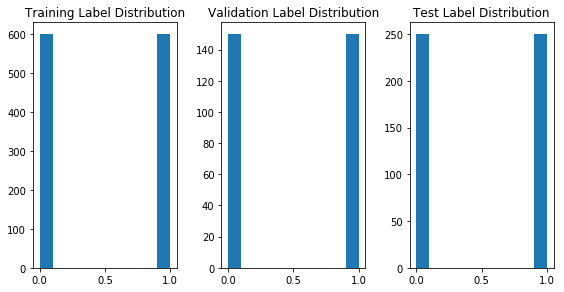

{0: 'non-face', 1: 'face'}


In [5]:
# Verify label distribution
fig, axes = plt.subplots(1,3, figsize=(8,4))
fig.tight_layout()
ax = axes.ravel()
ax[0].hist(dataset["train"]["labels"])
ax[0].set_title("Training Label Distribution")
ax[1].hist(dataset["valid"]["labels"])
ax[1].set_title("Validation Label Distribution")
ax[2].hist(dataset["test"]["labels"])
ax[2].set_title("Test Label Distribution")
plt.show()

print(dataset["label_map"])

In [6]:
def show_img(img, label_str, ax):
    '''
    Args: 
        img - (m,m) np.ndarray
               m is the side length of a square image
        label - (str) the label for that image
        ax - the axes to use for plotting with py plot
    '''
    side_length = int(math.sqrt(img.size))
    ax.set_title(label_str)
    ax.imshow(img*255.0, cmap = plt.cm.gray)

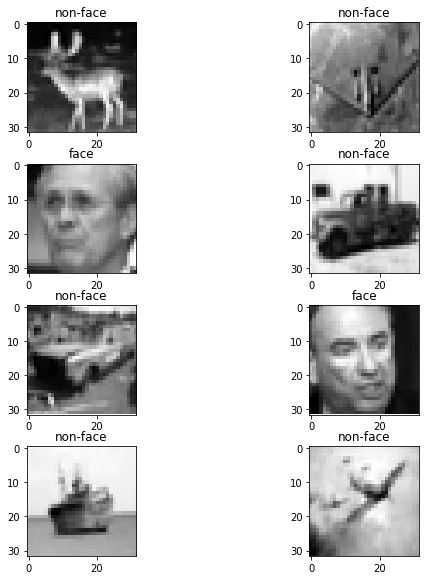

In [7]:
# select 4 random faces images and print their labels.
# you can re-run this cell multipe times to see different examples.
fig, axes = plt.subplots(4,2, figsize=(8,8))
fig.tight_layout()
ax = axes.ravel()
img_ids = np.random.randint(0, dataset["train"]["images"].shape[0]-1, 8)
for idx, i in enumerate(img_ids):
    show_img(dataset["train"]["images"][i], 
             dataset["label_map"][dataset["train"]["labels"][i]], 
             ax[idx])

## Selecting Features

As we discussed in class / on Piazza, passing images as $W$ x $H$ ("width" by "height", here we are excluding color for simplicity in this assignment) arrays of floating point numbers to our algorithm is to use our pixels as features. In other words, we are using the "pixel space" representation of our image. This is a rather poor space to understand images semantically. To distinguish between digits in MNIST using decision trees, for example, would require a large tree or many weak classifiers when using Boosting. 

For this assignment, we will focus on using other kinds of features. Historically in computer vision, many different types of features have been popular for different tasks - HOG, SIFT, SURF, general edge features, etc. In more recent literature, deep convolutional neural networks (CNNs) have become popular tools for extracting features from images that are highly correlated with the images' **semantic information**, such as the presence or abscence of an object. In classification tasks, features such as these could allow us to more efficiently classify or detect objects in images. 

While deep learning certainly gets a lot of press, we will use a simple set of features called ["Haar-like features"](https://en.wikipedia.org/wiki/Haar-like_feature). These were popularized by the [Viola-Jones object detection algorithm](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework) which demonstrated a "real-time" face detection algorithm in 2001. For this feat, the paper received several awards. The algorithm is still historically important, and it is interesting to compare and contrast Haar-like features from the features built by CNN algorithms (for more on that come to office hours).

Below will implement a function to extract Haar-like features and explain a little more about what they are and how to calculate them.

**Note**: "real-time" for Viola and Jones meant 2 frames-per-second (FPS) in 2001, but this might actually run in real time (60+ FPS) on hardware like a phone today.

Ref: [Viola-Jones original paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)

You will use the below functions in your code, but you do not need to modify them. Look them over to get an idea of what they will be used for (after you read the below explanation of "Haar-like Features".

In [8]:
def compute_integral_images(image_set):
    '''
    image_set : np.ndarray (N,M,M) set of images (as in the training or test images)
    
    returns the "integral images" which are used to calculate the haar features.
    '''
    int_image = np.zeros_like(image_set)
    for i in range(image_set.shape[0]):
        int_image[i,: , :] = integral_image(image_set[i])
    return int_image

def haar_features_from_image(img_integral, return_coords = False):
    '''
    Computes haar features for a single integral image
    
    Args:
        img_integral: integral image for a single np.ndarray (M,M)
        return_coords: whether or not to retrun box coordinates for each image.
    
    '''
    width = img_integral.shape[0]
    height = img_integral.shape[1]
    feature_types = ['type-3-x', 'type-2-x', 'type-2-y']
    features = haar_like_feature(img_integral, 0, 0, width, height, feature_type = feature_types)
    if(return_coords):
        feature_coord, feature_type = haar_like_feature_coord(width,height,
                            feature_type=feature_types)
        return features, feature_coord, feature_type
    else:
        return features
    

def filter_coord_by_area(coords, feature_types, min_area):
    '''
    Filters features by area
    '''
    keep = []
    keep_t = []
    for coord, typ in zip(coords, feature_types):
        width = coord[-1][1][0] - coord[0][0][0]
        height = coord[-1][1][1] - coord[0][0][1]
        area = width*height
        if(area > min_area):
            keep.append(coord)
            keep_t.append(typ)
    return np.array(keep), np.array(keep_t)


def get_haar_templates(feature_types=None):
    '''
    Returns haar templates for this task
    '''
    feature_coords, feature_types = haar_like_feature_coord(width=32, height=32,
                            feature_type=feature_types)
    return filter_coord_by_area(feature_coords, feature_types, 200)

    
def batch_haar_features(img_integrals, 
                        feature_types = None,
                        feature_coords = None):
    '''
    Computes haar features given an integral image set
    
    This could be better vectorized, but the scikit-image functions 
    don't allow it.
    
    Args:
        img_integral: integral image for a single np.ndarray (M,M)
        feature_types/feature_coords: allows you to specify exactly which haar features to compute
    
    '''
    width = img_integrals.shape[1]
    height = img_integrals.shape[2]
    
    # calculate these first to get the right shape.
    if(feature_coords is None):
         feature_coords, feature_types = haar_like_feature_coord(width=32, height=32,
                            feature_type=feature_types)
    print("Total Features: {}".format(len(feature_coords)))
    def haar(idx):
        return haar_like_feature(img_integrals[idx], 0, 0, width, height, 
                                             feature_type = feature_types,
                                            feature_coord = feature_coords)
    features = Parallel(n_jobs=-1,
                   prefer="threads", verbose=5)(map(delayed(haar), range(img_integrals.shape[0])))
    features = np.array(features)
        
    return features

In [9]:
def plot_haar(images, int_imgs, labels, label_map, img_ids, coords=None):
    '''
    
    Plots a 4x4 grid of images where each row 
    is a different image and image within the row displays a specific
    Haar feature from the feature set. 
    
    '''
    if(coords is None):
        feature_types = ['type-3-x', 'type-2-x', 'type-2-y']
        coords, _ = haar_like_feature_coord(32, 32,
                            feature_type=feature_types)     
    
    fig, axes = plt.subplots(len(img_ids), 4, figsize=(8,8))
    fig.tight_layout()
    ax = axes.ravel()
    
    for idx, i in enumerate(img_ids):
        img = images[i]
        int_img = int_imgs[i]

        show_img(img, label_map[labels[i]], ax[idx*4])

        # Select 4 random feature indices
        ft_idx = np.random.randint(0, coords.shape[0]-1, 4)
        for j in range(4):
            img_haar = draw_haar_like_feature(img,0,0,img.shape[0],img.shape[1],
                                             [coords[ft_idx[j]]])
            ax[idx*4+j].imshow(img_haar)
            ax[idx*4+j].set_title("{}".format(ft_idx[j]))
    plt.show()

### "Haar-like" Features

Haar-like features are named after the [Haar-basis](https://en.wikipedia.org/wiki/Haar_wavelet), which is a set of functions with varying scales that form an orthogonal basis for 1-D or 2-D functions or signals. Don't worry if you don't understand too much about what exactly this means. Haar-like features are conceptually simple. Consider the following:

![Figure1](haar1.png)

Each of the above four rectangles (A,B,C,D), which consist of white and grey sub-rectangles, is a single **feature template**. Each feature template is an axis-aligned rectangle. The important part about this template is the relative position of the white area with respect to the grey area. These feature templates are functions. They take values +1 on pixels that overlap with the white area and $-1$ on features that overlap with the grey area. Let's call these four sub-rectangles the "mother-templates" and give them names: 

$$ A=\psi_1(x,y), B=\psi_2(x,y), C=\psi_3(x,y), D=\psi_4(x,y) $$

Now, suppose we could move these mother-templates to different points in the above image. Then we can make a different template for each **location** in the image. Consider a templates "location" as is the (x,y) coordinates of its upper left hand corner. We'll denote the location of the template by a coordinate $(x,y)$ where $(0,0$ is the upper left-hand corner of the image. Finally, we can stretch the template to have different widths and heights, so the templates have 4 sources of variation: $(x,y, w,h)$:

So here is how we describe all our templates:

$$ \Psi = \{ \psi_{i,(x,y,w,h)} | i \in \{1,2,3,4\}, (x,y,h,w) \in \{0,...,W-1 = H-1\}^4 \} $$


**To calculate the feature-value** for each of these templates, we overlay the template on the image at the correct position and scale determined by the features $(x,y,w,h)$ coordinates, then we **sum the values of all the image pixels covered by the white (+1) region of the template** and **subtract all the values of the pixels covered by the grey part of the template**. The result is a single number.

Thus, after evaluating all the features for a single image, we will have a vector of numbers. This is now the feature vector for the image.

After we enumerate all these templates, how many total feature-templates are in $\Psi$? 

We won't write out a formula, but for a $32 \times 32$ image like in Cifar10, there are 509,270 possible features that are calculated from the above templates. (If that seems like a lot, try to calculate roughly how many there should be based on the above description). 

Because of this, even on modern hardware, it can take a second to compute all those. Furthermore, it seems intuitively unreasonable to have 500,000 features for a single image. However, we will find out that a handful of these features can be highly correlated with objects in greyscale images, and if we can find those good features, that have many useful properties we will explore below.

For each image in Cifar10, based on the above, we will get a vector of length $509,270$.

Clearly, **most of these features** will be pretty useless when classifying objects. However, **some of them will be highly correlated to specific patterns**:

![Figure2](haar2.png)

Of course, in computer science (especially in the dark ages in 2001), it is important to havea way to efficiently compute these features. To do so, the scikit-learn backend uses an [integral image](https://en.wikipedia.org/wiki/Summed-area_table), which can calculate any of the Haar-like features in constant time (4 lookup in the integral image). However, with the shear number of possible features, it is computationally expensive to compute all of them. 

In this assignment, we aren't too focused on how to compute these features. Instead, we just need to know that there are **a lot** of them, but potentially we could select a few using AdaBoost and then train a new boosted classifier using a smaller subset of the Haar-features, which would be very fast to compute.

Ref:

- [Viola-Jones Paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)
- [A video visualization of this exact algorithm in OpenCV](https://vimeo.com/12774628). Here we see the sliding-window detection implementation. 

### Visualizing Example Haar-like Features

We have written some helper functions above which take advantage of utilities provided by `scikit-image` to calculate the features.

In the plots below, we see a green and red rectangle (corresponding to white and grey regions above). Red is the "negative" region. Above each plot is the index of the feature.

For each image, we show 4 random possible features out of the 200k+ features we could calculate.

Calculating some Haar features for faces dataset...


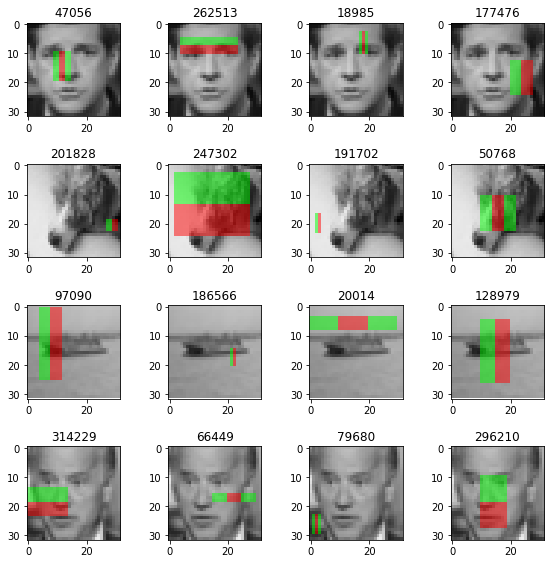

In [10]:
# select 4 random face dataset images and visualize them with some
# haar features
print("Calculating some Haar features for faces dataset...")
X_train_faces_integral = compute_integral_images(dataset["train"]["images"])
img_ids = np.random.randint(0, X_train_faces_integral.shape[0]-1, 4)
plot_haar(dataset["train"]["images"], X_train_faces_integral, 
          dataset["train"]["labels"], dataset["label_map"], 
          img_ids)

### Haar-like Feature Questions (2pts)

Please answer the following question to test your understanding of these features. 

Suppose the image is of size $ 8 \times 8$. You have one Haar "mother template" feature which is non-zero on a grid of $1 \times 2$ pixels. The left pixel has the $+1$ region and the right is the $-1$ region. All scaled and repositioned versions of this template consist of all possible rectangular sub-regions of the full $8 \times 8$ grid where the left half of the rectangle is the $+1$ region and the right half is the $-1$ region. How many possible features can be generated from this template? 

Note that the smallest possible template here is the mother template, and "all possible rectangular sub-regions" means that you don't count templates that extend past the image. So the mother template positioned with the +1 pixel on the right edge of the image does not count. 

You must explain your work. 

Hints: 
- You can't "reflect" the $1 \times 2$ template so that the $-1$ appears on the left. That is a different mother-template, so need need to count those.
- For the $1 \times 2$ mother template, you can position it at all possible $1 \times 2$ rectangular sub-regions in the image. For each row of the image, there are $7$ possible $1 \times 2$ sub-regions. Thus there are $8 \times 7 = 56$ posible $1 \times 2$ features at this scale.  
- The largest possible scale for this mother template is $8 \times 8$. There is exactly one possible position for this template, since we don't count when it extends beyond the image.

We just counted the number of features for scales 1 and 8. Now you just have to do scales (1,N),(2,N),...,(8,N) where $N$ ranges from $2$ to $8$, except for scales (1,2) and (8,8). Rather than counting (that would take a while), derive a formula.

For every 1 pixel wider the template becomes, there is 1 fewer "column" subregions of the image that it can fit into. For instance, if the template is 2 pixels wide, it can fit into 7 columns. If it is 4 pixels wide, then it can fit in 4 columns. If it is 8 pixels wide, then it can fit into 1 column. This gives the number of subregions for the width of the image:

$$ Num\_Subregions_W = Image\_Width - Template\_Width + 1$$

Noting the the Template__Width is a value in {2, 4, 6, 8}.

This is similar with the heights of the template. For every 1 pixel longer the template becomes, there is 1 fewer "row" subregion that it can fit into. The height of the template is then between \[1, 8\]. With this we get the number of subregions for the length of the image:

$$ Num\_Subregions_L = Image\_Length - Template\_Length + 1 $$

So to get the total number of subregions for a single template size would be the same as taking the area:

$$ Num\_Subregions = Num\_Subregions_W * Num\_Subregions_L$$

To get the total number of subregions for all template widths and heights, we will need find the sum of the number of subregions for each individual template size:

$$ Total\_Subregions = \sum_{L={1, 2, 3, 4, 5, 6, 7, 8}} \sum_{W\in{2, 4, 6, 8}} Num\_Subregions_W * Num\_Subregions_L $$

From the code cell below, we can see that there are 576 subregions (and thus features) for the 8x8 image.

In [11]:
widths = np.arange(2, 9, 2)
heights = np.arange(1, 9)
image_width = 8
image_height = 8

total = 0
for h in heights:
    for w in widths:
        total += (image_width - w + 1) * (image_height - h + 1)
print("The total number of subregions is {}".format(total))

The total number of subregions is 576


### AdaBoost for Face Detection

We will now train [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) with depth-1 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) as the "weak  base classifier" to classify $32 \times 32$ pixel images as either "face" or "no face".

In computer vision, typically a "detection" algorithm includes localizing a detected object within an image. In the original Viola-Jones paper, they first train a classifier using the method that we walk you through below. Then, they use this classifier in a sliding-window manner on larger images to detect faces. We will do only the first part in this assignment, and the second part is extra credit (but is the most satisfying result to see).

In addition, the only difference between what they do in the paper and what is done here is that multiple classifiers are created in a tiered manner. So many AdaBoostClassifiers would be trained and applied in stages where earlier stages have fewer features. They do this because they find it helps improve accuracy without sacrificing speed since the algorithm can "bail out" at early stages when the detection probability is low. However, we will not implement this staged feature. 

The steps we will do this are as follows:

1. First we will write a function `build_boosted_dt` to build a basic boosted decision tree using `AdaBoostClassifier` with a base class of `DecisionTreeClassifier`

- Because we will use this function for building deicion tree classifiers for images with raw pixel features and Haar features, it's important that within the DecisionTreeClassifier base parameters, you set **"max_features"**
- You should also set **random_state=0** in both the DeciionTreeClassifier base class as well as the AdaBoostClassifier object.
- Your `build_boosted_dt` function should accept parameters `max_ensemble_size`, `max_depth`

2. Then we will apply this algorithm on the naive "raw pixels" form of our dataset. This will give us a good baseline to compare against the same algorithm using the Haar subset.
3. We will analyze the performance characterstics as a function of maximum ensemble size of this classifier.
4. We will then extract all possible Haar-like features from the dataset images and run a AdaBoost algorithm with as a way to perform feature selection for a subset of the 200,000+ Haar features.
5. Finally, we will train a final boosted depth-1 decision tree to on our Haar subset. 

The output should be a highly precise, interpretable, and very fast face-detection algorithm. 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

### Build the Boosted Classifier Factory Function (2 pts)

Fill out the function below to build the boosted classifier using Scikit-learn's [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [13]:
def build_boosted_dt(features, labels, max_ensemble_size=10, max_depth=1, max_features=None):
    '''
    build_boosted_dt
    
    args: 
        features - np.ndarray of shape (NumExamples, NumFeatures)
        labels - np.ndarray of shape (NumExamples,)
        max_ensemble_size - the maximum number of estimators that AdaBoost uses
        max_depth - max depth of the base DecitionTreeClassifier
    returns: 
    
        a scikit-learn AdaBoostClassifier, with a base classifier of DecisionTreeClassifier
    
        the AdaBoostClassifier should be fitted to the features and labels.
    '''
    # YOUR CODE HERE
    base_estimator = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=max_ensemble_size, random_state=0)
    clf.fit(features, labels)
    return clf

In [14]:
# Do not delete this cell


### Evaluate the Boosted Classifier using Pixel Features on the Faces Dataset (6 pts)

We are first going to try the "naive" approach, which is similar to what we did with MNIST - classifying based on shallow decision trees that draw thresholds as functions of the value of a single pixel. 

#### Fill in the function below to build the classifier using different numbers for the max ensemble size.

- In the first cell, you should fill in only the function `bdt_evaluation`, which automates the building and assessing recall, precision, accuracy, and runtime performance on the validation data.
- Follow the function spec
- You should fix the max_depth of the base tree to be 1.
- Note you shouldn't use the global variables in `dataset` inside this function.

#### Second Task (evaluation): 
In the second cell, you can write the code to actually call `bdt_evaluation` and plot your results using the raw image as features into the classifier.

The specific things you need are:
- A plot of accuracy vs. max number of classifiers in the ensemble
- A plot of precision and recall vs. max number of classifiers (both precision and recall in the same plot)
- A plot of runtime (for the fit procedre) vs. max number of classifiers in the ensemble
- A plot of runtime (for the inference on the validation set) vs. max number of classifiers in the ensemble. Report this procedure in "sec / image"
- Print out the maximum accuracy, precision, and recall, as well as the values of `max_ensemble` that achieve those values on the validation set. 

- Now since we are performing face recognition, select a value for `max_ensemble` that maximizes recall for a resonable precision tradeoff. Re-build the classifier using `build_boosted_dt` and report precision, recall, and accuracy on the **test set**.

- Note that the classifier wants a linear set of features, but the X_train_faces is of shape (N, M, M ) Thus, you need to reshape it to (N, M*M ) before you bass to `bdt_evaluation`.

We set `max_ensemble_range` to be the values you should use to pass into `bdt_evaluation`.

Notes:
- Note you may reuse the `bdt_evaluation` function, so you shouldn't do anything in there particular to one set of features or another.
- You may use the [sckit-learn functions for metrics](https://scikit-learn.org/stable/modules/classes.html), which we've imported above already.
- We import Parralel and delayed from [joblib]() if you know how to use parallel loops, you can use it within your bdt_evaluation function. Please use a concurrency level <= 6.

In [15]:

def bdt_evaluation( X_train, y_train,
                    X_valid, y_valid,
                    max_ensemble_values = range(1,11)):
    '''
    bdt_evaluation
    
    loop over all values in max_ensemble_values
    
        - call build_boosted_dt on the train data
        - evaluate acc, recall, precision on the validation data,
        - save those values in arrays to return as described below
    
    Args:
        X_train - np.ndarray of size (NumTrainExamples, NumFeatures) 
        y_train - np ndarray of size (NumTrainExamples, )
        X_test - np .ndarray of size (NumTestExamples, Num Features)
        y_test np.ndarray of size (NumTestExamples, )
        max_ensemble_values
        
    Returns:
        Dictionary of the form
        {
            "accuracy": np.ndarray containing the accuracy values, one for each value in 
                        the input argument "max_ensemble_values",
            "precision": np.ndarray containing the precision values, one for each value in 
                        the input argument "max_ensemble_values",
            "recall": np.ndarray containing the recall values, one for each value in 
                        the input argument "max_ensemble_values",
            "runtime_inference": np.ndarray containing how long it took to perform 
                        validation set prediction for the value of "max_ensemble_values"
                        given by the index.
                        Don't include metric calculations in this number.
                        You can use time.time() to get start and end times
            "runtime_train": np.ndarray containing how long it took to perform training set
                        fitting  for the value of "max_ensemble_values"
                        given by the index.
                        You can use time.time() to get start and end times
        }
    '''
    # YOUR CODE HERE
    # Initialize all the np.arrays
    n = len(max_ensemble_values)
    accuracies = np.zeros(n)
    precisions = np.zeros(n)
    recalls = np.zeros(n)
    train_times = np.zeros(n)
    pred_times = np.zeros(n)
    
    for index, num_ensembles in enumerate(max_ensemble_values):
        # Start timing the model
        start_time_train = time.time()
        fitted_ensemble = build_boosted_dt(X_train, y_train, max_ensemble_size=num_ensembles, max_depth=1)
        time_train = time.time() - start_time_train
        
        start_time_pred = time.time()
        pred = fitted_ensemble.predict(X_valid)
        time_pred = time.time() - start_time_pred
        
        accuracy = accuracy_score(y_valid, pred)
        precision = precision_score(y_valid, pred)
        recall = recall_score(y_valid, pred)
        
        # Add each calculated value to each score array
        accuracies[index] = accuracy
        precisions[index] = precision
        recalls[index] = recall
        train_times[index] = time_train
        pred_times[index] = time_pred
    
    # Add each np.array to the result dictionary
    results = {"accuracy": accuracies,
               "precision": precisions,
               "recall": recalls,
               "runtime_inference": pred_times,
               "runtime_train": train_times}
    
    return results

In [16]:
# Do not delete this cell. Do not write anything in this cell.

Your answer to the second part goes in the cell below.

It should take ~30-40 lines of code for all plots and metrics.

Our solution runs in 1.9 seconds

You should use the following when calling `bdt_evaluate`:

```
max_ensemble_range = list(range(1,32,2))
```

The maximum accuracy was 0.9567 with max_emsemble value 29
The maximum recall was 0.9533 with max_emsemble value 29
The maximum precision was 0.9597 with max_emsemble value 29
The maximum f-score was 0.9565 at max_emsemble value 29. This is the max_ensemble valuefor our final classifier.

The final model with max_ensemble_size=29 had the following scores on the test set:
Accuracy: 0.9140
Precision: 0.9259
Recall: 0.9000
Time to train: 5.0582
Time to predict: 0.0911


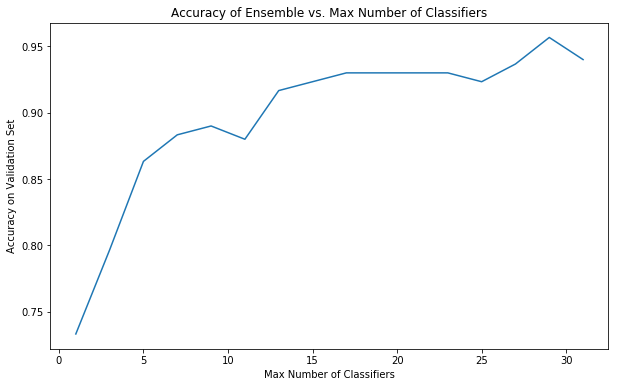

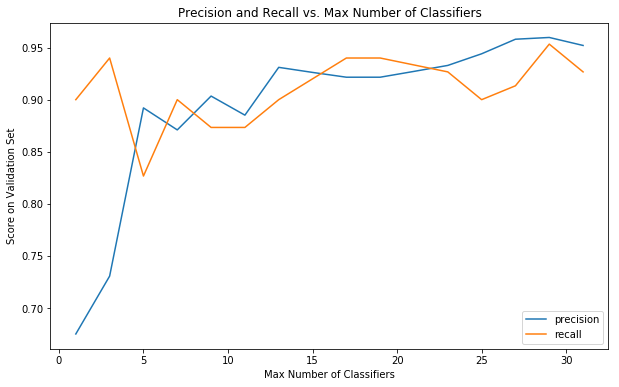

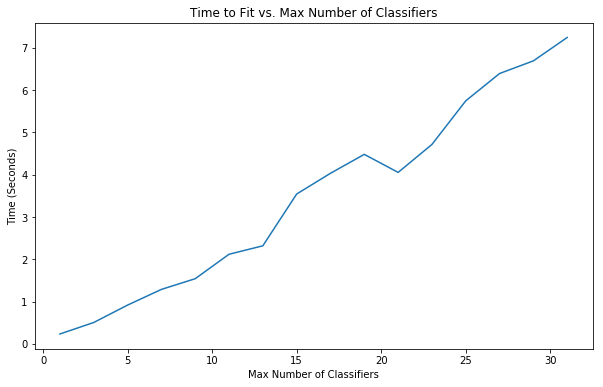

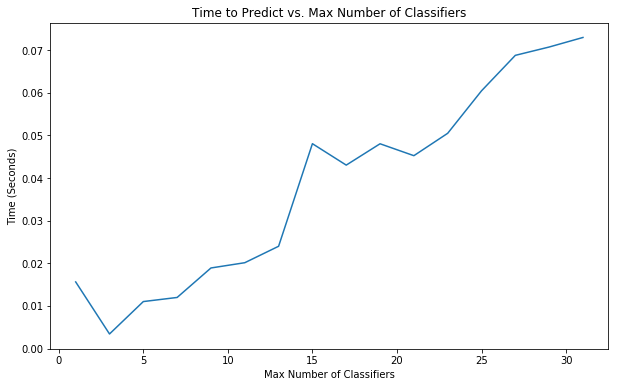

In [17]:
# Reshape the images vector for the training, validation and test sets
X_train = np.ndarray(shape=(dataset["train"]["images"].shape[0], dataset["train"]["images"].shape[1]**2))
for index, image in enumerate(dataset["train"]["images"]):
    X_train[index] = image.flatten()

X_valid = np.ndarray(shape=(dataset["valid"]["images"].shape[0], dataset["valid"]["images"].shape[1]**2))
for index, image in enumerate(dataset["valid"]["images"]):
    X_valid[index] = image.flatten()
    
X_test = np.ndarray(shape=(dataset["test"]["images"].shape[0], dataset["test"]["images"].shape[1]**2))
for index, image in enumerate(dataset["test"]["images"]):
    X_test[index] = image.flatten()
# Calculate the results for multiple ensemeble sizes
max_ensemble_range = list(range(1,32,2))
results = bdt_evaluation(X_train,
                         dataset["train"]["labels"],
                         X_valid,
                         dataset["valid"]["labels"],
                         max_ensemble_values=max_ensemble_range)

# - A plot of accuracy vs. max number of classifiers in the ensemble
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["accuracy"])
ax.set_title("Accuracy of Ensemble vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Accuracy on Validation Set")

# - A plot of precision and recall vs. max number of classifiers (both precision and recall in the same plot)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["precision"], label="precision")
ax.plot(max_ensemble_range, results["recall"], label="recall")
ax.set_title("Precision and Recall vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Score on Validation Set")
ax.legend()

# - A plot of runtime (for the fit procedre) vs. max number of classifiers in the ensemble
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["runtime_train"])
ax.set_title("Time to Fit vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Time (Seconds)")

# - A plot of runtime (for the inference on the validation set) vs. max number of classifiers in the ensemble. Report this procedure in "sec / image"
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["runtime_inference"])
ax.set_title("Time to Predict vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Time (Seconds)")

# - Print out the maximum accuracy, precision, and recall, as well as the values of `max_ensemble` that achieve those values on the validation set. 
max_acc = np.max(results["accuracy"])
max_acc_index = np.argmax(results["accuracy"])
print("The maximum accuracy was {:0.4f} with max_emsemble value {}".format(max_acc, max_acc_index*2 + 1))

max_recall = np.max(results["recall"])
max_recall_index = np.argmax(results["recall"])
print("The maximum recall was {:0.4f} with max_emsemble value {}".format(max_recall, max_recall_index*2 + 1))

max_prec = np.max(results["precision"])
max_prec_index = np.argmax(results["precision"])
print("The maximum precision was {:0.4f} with max_emsemble value {}".format(max_prec, max_prec_index*2 + 1))

# - Now since we are performing face recognition, select a value for `max_ensemble` that maximizes recall for a resonable precision tradeoff. 
F_scores = 2 * results["precision"] * results["recall"] / (results["precision"] + results["recall"])
max_f = np.max(F_scores)
max_f_index = np.argmax(F_scores)
max_ensembles = max_f_index * 2 + 1
print("The maximum f-score was {:0.4f} at max_emsemble value {}. This is the max_ensemble value"
      "for our final classifier.".format(max_f, max_ensembles))

# Re-build the classifier using `build_boosted_dt` and report precision, recall, and accuracy on the **test set**.
s = time.time()
final_model = build_boosted_dt(X_train, dataset["train"]["labels"], max_ensemble_size=max_ensembles, max_depth=1)
fit_time = time.time() - s
s = time.time()
test_preds = final_model.predict(X_test)
pred_time = time.time() - s

test_accuracy = accuracy_score(dataset["test"]["labels"], test_preds)
test_precision = precision_score(dataset["test"]["labels"], test_preds)
test_recall = recall_score(dataset["test"]["labels"], test_preds)

print()
print("The final model with max_ensemble_size={} had the following scores on the test set:".format(max_ensembles))
print("Accuracy: {:0.4f}".format(test_accuracy))
print("Precision: {:0.4f}".format(test_precision))
print("Recall: {:0.4f}".format(test_recall))
print("Time to train: {:0.4f}".format(fit_time))
print("Time to predict: {:0.4f}".format(pred_time))

### ANALYSIS QUESTIONS (4 pts)

Based on the graphs above, answer the following questions:

1. What are the tradeoffs involved in terms of runtime/computational resources and the increased ensemble size?



2. What does the `max_features` parameter in Scikit-Learn's DecisionTreeClassifier control? If we didn't set this parameter, how many features would be used if we passed in data with 100,000 features?


1. Both the time to fit the model and to clasify a new sample increased near linearly as the maximum number of classifiers in the ensemble increased. It took $\approx 0.5$ seconds to fit an ensemble with 5 weak learners whereas it took $\approx 4.0$ seconds to fit a model with 30 weak learners. Therefor, there is a point where increasing training and prediction time is more impactful than increasing the ensemble's effectiveness.
2. The max_features parameter controls the number of features that the algorithm will look at before it makes a decision on what the "best" feature to split on. If we didn't use this parameter, then it will look at all the possible features. If we passed in data with 100,000 features, then it would analyze all 100,000 features for each split.

### Haar Feature Selection and Use with AdaBoost (10 pts)

Now we want to do the same thing as above, but this time for Haar features. However, there is a problem. If we were to simply take all the Haar features given by our `batch_haar_features` function, we would end of with about 100,000 features per images. This wouldn't nearly be a fair comparison to the $32 \times 32$ pixel features available to classifier above. 

To reduce our features, we do the following. 
1. Train Adaboost out with a large ensemble size (100) and all the features (~100,000) per image.
2. We will inspect which features AdaBoost "favors" by looking at the ensemble weights (the $\alpha_k$ from class). 
3. We will then select a much smaller subset on par with the 1024 pixel features in the raw image. 

The hope is that these features will give us better performance than the pixel features, and in addition that they will be interpretable (we can look at the pattern of the feature, and it may correspond to certain features in faces), and also very fast.

In addition, we could hope that we could apply these features onto a larger image where we can assess whether or not a face is in each 32 x 32 window of the image, and further we could generalize them to different scales rather easily for larger windows. There is no reason to belive the decision tree algorithm on pixel could be generalized in such a manner. 

The code below you need to write is the following

1. Compute the integral images for the train and valid data sets using the `compute_integral_images` function.
2. Compute the haar features using the `batch_haar_features` function. This may take up to a couple minutes on your computer.
3. Train AdaBoost with a depth-1 decision tree and 100 max ensemble size using your `build_boosted_dt` function on the **training data**. This may take several minutes. 
4. Report the accuracy, precision, and recall for your classifier **on your validation set**. At this point, it should be exremely high.
5. Inspect the feature "importance weights" of the classifier by calling the `.feature_importances_` method of your trained AdaBoostClassifier. This returns the set of feature weights, calculated by counting all the times a feature was used by one of the weak classifiers, weighted by the ensemble weight. The are normalized to add up to one. Plot a histogram that shows the distributions of these weights. Do you have many weights that are nonzero? Or do you have a "sparse" set of weights?
6. Select the best set of 600 haar features using the `.feature_importances_` and `get_best_haar_features` function we provide for you.
7. Rebuild the haar features using the `batch_haar_features` function **on the training set**. This time pass in the `feature_coord_best` and `feature_type_best` to the `batch_haar_features` function. This should build these functions very fast.
8. At this point, we now have selected our subset. But we need to select ensemble size again. For this, we will use `bdt_evaluate` as we did above. Make the same set of plots:


- A plot of accuracy vs. max number of classifiers in the ensemble
- A plot of precision and recall vs. max number of classifiers (both precision and recall in the same plot)
- A plot of runtime (for the fit procedre) vs. max number of classifiers in the ensemble
- A plot of runtime (for the inference on the validation set) vs. max number of classifiers in the ensemble. Report this procedure in "sec / image"
- Print out the maximum accuracy, precision, and recall, as well as the values of `max_ensemble` that achieve those values on the validation set. 


9. Rebuild the classifier with the appropriate features and max ensemble size on the **full training set (including validation)**
10. Report precision, recall, and accuracy on the **test set**. 
11. Use the `plot_haar` function we wrote above to visualize the "highest weight" features. Be sure to pass these to the `coords` parameter for `plot_haar`.

We split the cells below so that you can put the computationally heavy portions in seprate cells then iterate on the rest in the last cell.

In [18]:
# Helper function. Feel free to use this at step 6 
def get_best_haar_features(feature_weights, num_features, feature_types=None):
    '''
    get_best_haar_features
    Args
        feature_weights: the weights given by classifier.feature_importances_ 
        num_weights: (integer) select the top "num_weights" features
        feature_types: the list of feature types originally generated (given below)
        
    Returns
        feature_coords_best, feature_types_best
        
        The above two arrays should be passed to "batch_haar_features" in order to generate
        the final features in step 7.
    '''
    feature_coords, feature_types = get_haar_templates(feature_types)
    
    # Sort the indices in decreasing weight
    idx_sorted = np.argsort(feature_weights)[::-1]
    feature_coords_best = feature_coords[idx_sorted[:num_features]]
    feature_types_best = feature_types[idx_sorted[:num_features]]
    
    print("Feature weight: ", np.sum(feature_weights[idx_sorted[:num_features]])/np.sum(feature_weights))
    
    return feature_coords_best, feature_types_best



This cell is for step 1+2
This could take a couple minutes on a slower laptop CPU

We give you the following parameters to pass to the function "batch_haar_features".
This reduces the number of features used, making the procedure cheaper.
```
haar_types = ['type-3-x', 'type-2-x', 'type-2-y']
feature_coords, feature_types = get_haar_templates(haar_types)
```

This step should take ~10 lines of code


In [19]:
# Steps 1 and 2
haar_types = ['type-3-x', 'type-2-x', 'type-2-y']
feature_coords, feature_types = get_haar_templates(haar_types)

X_train_faces_integral = compute_integral_images(dataset["train"]["images"])
X_train_features = batch_haar_features(X_train_faces_integral, feature_types=feature_types, feature_coords=feature_coords)

X_valid_faces_integral = compute_integral_images(dataset["valid"]["images"])
X_valid_features = batch_haar_features(X_valid_faces_integral, feature_types=feature_types, feature_coords=feature_coords)

Total Features: 65382


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.2min finished


Total Features: 65382


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.7s finished


The below cell is for step 3.
It should take Should be ~1 line of code

Use the following parameters:
```
max ensemble size should be 100
max depth should be 1
max_features=1000
```

In [20]:
# Step 3
haar_model = build_boosted_dt(X_train_features, 
                              dataset["train"]["labels"], 
                              max_ensemble_size=100,
                              max_depth=1,
                              max_features=1000)

This cell is for step 4.
It should take ~4 lines of code.

In [21]:
# Step 4
pred_valid = haar_model.predict(X_valid_features)
haar_acc = accuracy_score(dataset["valid"]["labels"], pred_valid)
haar_prec = precision_score(dataset["valid"]["labels"], pred_valid)
haar_recall = recall_score(dataset["valid"]["labels"], pred_valid)
print("Accuracy: {:0.4f}\nPrecision: {:0.4f}\nRecall: {:0.4f}".format(haar_acc, haar_prec, haar_recall))

Accuracy: 0.9633
Precision: 0.9664
Recall: 0.9600


Use the below cell for steps 5-6.
It should take ~4 two lines of code.
Use `num_features=1024` and be sure to pass in `haar_types` to `get_best_haar_features`.

Feature weight:  1.0


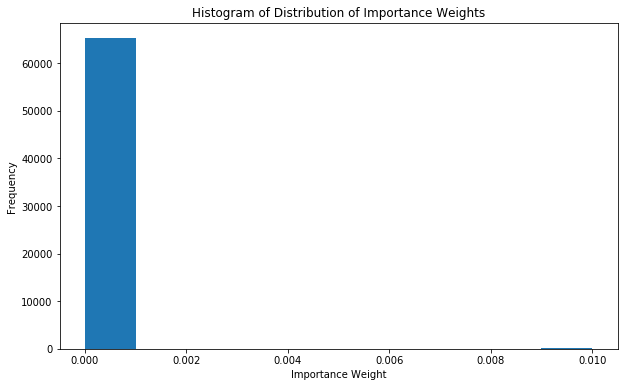

In [22]:
# Step 5 and 6
importance_weights = haar_model.feature_importances_

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(importance_weights)
ax.set_title("Histogram of Distribution of Importance Weights")
ax.set_xlabel("Importance Weight")
ax.set_ylabel("Frequency")

feature_coords_best, feature_types_best = get_best_haar_features(importance_weights, 600, feature_types=haar_types);

Below cell is for steps 7-10
It should take ~ 40-50 lines of code for all plots. You also need to rebuild all features in the beginnning with 
the new features subset you found in the above step.

Ensure you set the following when conducting the evaluation with `bdt_evaluation`:
```
max_ensemble_range = list(range(1,32,2))
```

Total Features: 600


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Total Features: 600


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


The maximum accuracy was 0.9633 with max_emsemble value 29
The maximum recall was 0.9600 with max_emsemble value 31
The maximum precision was 0.9728 with max_emsemble value 23
The maximum f-score was 0.9630 at max_emsemble value 11. This is the max_ensemble valuefor our final classifier.
Total Features: 600


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished



The final model with max_ensemble_size=23 had the following scores on the test set:
Accuracy: 0.9580
Precision: 0.9636
Recall: 0.9520
Time to train: 0.5290
Time to predict: 0.0429


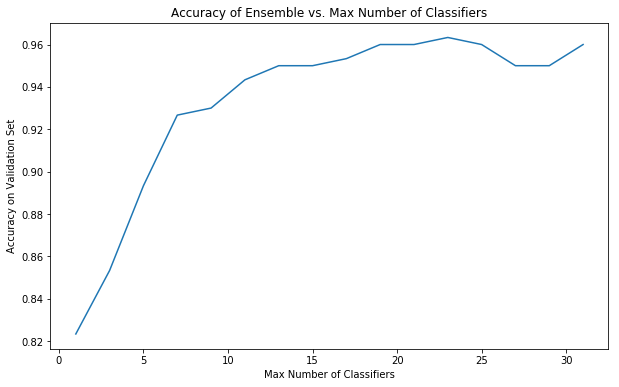

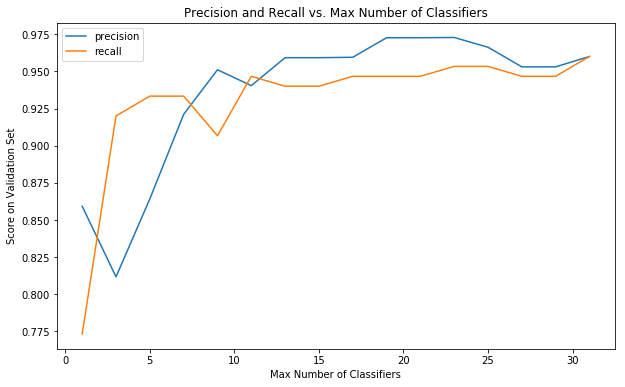

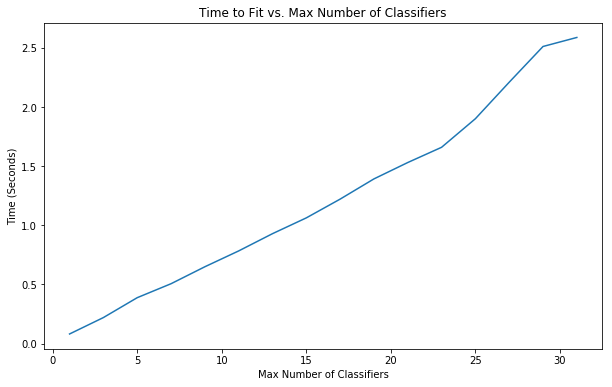

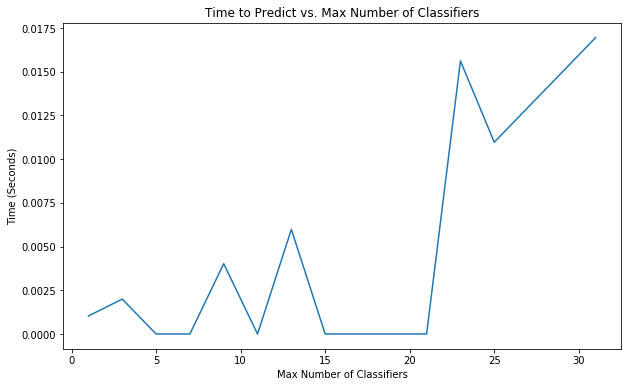

In [23]:
# Step 7
best_X_train = batch_haar_features(X_train_faces_integral, feature_types=feature_types_best, feature_coords=feature_coords_best)
best_X_valid = batch_haar_features(X_valid_faces_integral, feature_types=feature_types_best, feature_coords=feature_coords_best)

# Step 8
max_ensemble_range = list(range(1,32,2))
results = bdt_evaluation(best_X_train,
                         dataset["train"]["labels"],
                         best_X_valid,
                         dataset["valid"]["labels"],
                         max_ensemble_values=max_ensemble_range)

# - A plot of accuracy vs. max number of classifiers in the ensemble
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["accuracy"])
ax.set_title("Accuracy of Ensemble vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Accuracy on Validation Set")

# - A plot of precision and recall vs. max number of classifiers (both precision and recall in the same plot)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["precision"], label="precision")
ax.plot(max_ensemble_range, results["recall"], label="recall")
ax.set_title("Precision and Recall vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Score on Validation Set")
ax.legend()

# - A plot of runtime (for the fit procedre) vs. max number of classifiers in the ensemble
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["runtime_train"])
ax.set_title("Time to Fit vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Time (Seconds)")

# - A plot of runtime (for the inference on the validation set) vs. max number of classifiers in the ensemble. Report this procedure in "sec / image"
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(max_ensemble_range, results["runtime_inference"])
ax.set_title("Time to Predict vs. Max Number of Classifiers")
ax.set_xlabel("Max Number of Classifiers")
ax.set_ylabel("Time (Seconds)")

# - Print out the maximum accuracy, precision, and recall, as well as the values of `max_ensemble` that achieve those values on the validation set. 
max_acc = np.max(results["accuracy"])
max_acc_index2 = np.argmax(results["accuracy"])
print("The maximum accuracy was {:0.4f} with max_emsemble value {}".format(max_acc, max_acc_index*2+1))

max_recall = np.max(results["recall"])
max_recall_index = np.argmax(results["recall"])
print("The maximum recall was {:0.4f} with max_emsemble value {}".format(max_recall, max_recall_index*2+1))

max_prec = np.max(results["precision"])
max_prec_index = np.argmax(results["precision"])
print("The maximum precision was {:0.4f} with max_emsemble value {}".format(max_prec, max_prec_index*2+1))

F_scores = 2 * results["precision"] * results["recall"] / (results["precision"] + results["recall"])
max_f = np.max(F_scores)
max_f_index = np.argmax(F_scores)
print("The maximum f-score was {:0.4f} at max_emsemble value {}. This is the max_ensemble value"
      "for our final classifier.".format(max_f, max_f_index))

# Step 9
full_training = np.concatenate((best_X_train, best_X_valid))
full_labels = np.concatenate((dataset["train"]["labels"], dataset["valid"]["labels"]))
max_ensembles = max_f_index * 2 + 1
final_model = build_boosted_dt(full_training, full_labels, max_ensemble_size=max_ensembles, max_depth=1)

# Step 10
X_test_faces_integral = compute_integral_images(dataset["test"]["images"])
s = time.time()
best_X_test = batch_haar_features(X_test_faces_integral, feature_types=feature_types_best, feature_coords=feature_coords_best)
test_fit_time = time.time() - s

s = time.time()
test_preds = final_model.predict(best_X_test)
test_pred_time = time.time() - s
test_accuracy = accuracy_score(dataset["test"]["labels"], test_preds)
test_precision = precision_score(dataset["test"]["labels"], test_preds)
test_recall = recall_score(dataset["test"]["labels"], test_preds)

print()
print("The final model with max_ensemble_size={} had the following scores on the test set:".format(max_ensembles))
print("Accuracy: {:0.4f}".format(test_accuracy))
print("Precision: {:0.4f}".format(test_precision))
print("Recall: {:0.4f}".format(test_recall))
print("Time to train: {:0.4f}".format(test_fit_time))
print("Time to predict: {:0.4f}".format(test_pred_time))

The final cell here is for step 11.

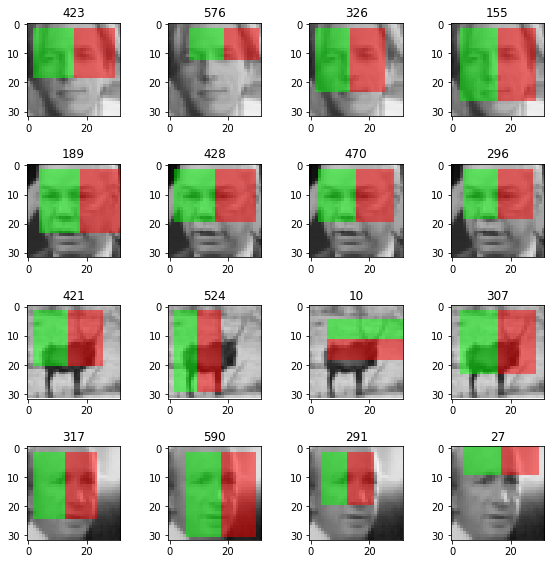

In [24]:
# Step 11
img_ids = np.random.randint(0, X_train_faces_integral.shape[0]-1, 4)
plot_haar(dataset["train"]["images"], X_train_faces_integral, 
          dataset["train"]["labels"], dataset["label_map"], 
          img_ids, coords=feature_coords_best)

### Final Analysis (6pts)

#### What did we accomplish?

So far we have done the following:

- We trained the AdaBoostClassifier with a base DecisionTreeClassifier on the "pixel features" of the dataset, and selected the `max_ensemble_size` parameter basd on validation performance. We plotted graphs of the accuracy, precision, and recall of this ensemble classifier vs the max ensemble size. We also plotted the amount of time it took to fit and predict using these ensemble classifers of varying size. Then we selected a parameter, retrained the model, and evaluated the test set precision, recall, and accuracy.


**QUESTION 1**

Summarize your final **pixel-feature** based model here. What was the ensemble size you picked? What was the test set precision, recall, and accuracy? What were the runtime performances?


- We trained the AdaBoostClassifier with a base DecisionTreeClassifier on the "haar features" of the dataset, selected a susbset of the features, rebuilt the classifier using those features, and selected the `max_ensemble_size` parameter basd on validation performance. We plotted graphs of the accuracy, precision, and recall of this ensemble classifier vs the max ensemble size. We also plotted the amount of time it took to fit and predict using these ensemble classifers of varying size. Then we selected a parameter, retrained the model, and evaluated the test set precision, recall, and accuracy.

**QUESTION 2**

Summarize your final **Haar-like feature** based model here. What was the ensemble size you picked? What was the test set precision, recall, and accuracy? What were the runtime performances?

**QUESTION 3**
Compare the above two models. You may find that accuracy/precision/recall were similar. This is somewhat a factor of the "easiness" of the task and data. You should also compare runtime performance, however. Consider that if we used this model in a sliding-window detection scheme, we would have to run it 1000s of times for every image, so a small difference in runtimes may add up. You should also compare interpretability.


1. For our final pixel-feature model, we settled with a max_ensemble_size of 29. We got this value by finding the maximum f_score for the models when fitted with different max_ensemble_size values. With a max size of 29, we got a final accuracy of 0.914, precision of 0.926 and recall 0f 0.900. It took $\approx 5.74$ seconds to train the model to the pixels and $\approx 0.08$ seconds to classify the test set.
2. For the Haar-like model, we ended with a max ensemble size of 23, again by finding the maximum f_score of many models with different maximum ensemble sizes. This model had an accuracy of 0.958, a precision of 0.964 and a recall of 0.952. It took about 0.788 seconds to train and 0.048 seconds to classify the test set.
3. By comparing the two models, we can see that it that the Haar-like feature based model performed better than the pixel-feature model in every category. It had better accuracy (+0.044), precision (+0.038) and recall (+0.052) scores, used fewer number of ensembles (which saved memory), was trained faster (-4.95 seconds) and classified new data faster (about twice as fast). The time component matters because, in the case of a large "sliding window" where the classifier would be used 1000's of times, it would reduce the amount of time spent classifying by about half. The Haar-like model is also more interpretable. Instead of trying to determine why certain pixels are more important than other pixels, it makes sense to be able to look at the Haar templates and see which templates, at which sizes and positions, most often correctly classify face-areas from non-face-areas.

### Extra Credit: Perform Face Detection on a Large Image (4pts)

For the bonus round, find an image with many small faces facing the camera. 

Here's an example of such an image: [largest group selfie ever](https://www.cs.cmu.edu/~peiyunh/tiny/).

Use the algorithm we trained in a sliding-window manner to try to detect faces. Output the image with boxes around the detections. You must include all code (including drawing the boxes, etc). You may not import/use OpenCV. 

Here's a result we were able to come up with rather quickly (~30 lines of code). 

As you can see, we are only detecting at one scale (32 x 32), so that places a large limitation on our performance. In fact, many faces in the second image are 32x32, so it performs rather well mid-crowd.

The faces range from very tiny to hundreds of pixels large. We could extend this relatively easily by scaling our dataset and training the detector at multiple scales. This would involve training multiple detectors on images of different scales. You could even just synthetically augment existing data by scaling to different sizes.

Finally, our current detector is rather slow. It took about (~1 min) per image on an Intel i5-9500. This is because it runs the full AdaBoostClassifier on each 32x32 batch with stride 8 (meaning after each batch, it slides up or down by 8 pixels to get to the next batch). The original algorithm used a "cascade" of classifiers where the first classifier used only 8 features to quickly reject non-face patches with high recall rate. See the original paper for more details. OpenCV has an efficient implementation.

The below two images are detections at different strides / threshold levels:

![FacePredictions1](crowd2_sample.jpg)

![FacePredictions2](crowd2_dense.jpg)

Hints:
1. Control how finely you "stride" your window over the image for better detections.
2. You shouldn't use all predictions where the classifier outputs "1". Use a threshold you can tune, and use the method ".predict_proba" from your `AdaBoostClassifier` class. 
3. You will notice above that many predictions are overlapping. In almost all object detection systems, including the most popular CNN based methods, you need to implement [non-max-suppression](https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/) combining your outputs, the classifier confidence, and some intersection thresholds to prune the outputs in a greedy manner such that the most confident "suppress" the less confident boxes with which it overlaps. We did not implement any NMS for this prediction.

In [ ]:
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.draw import rectangle_perimeter

def predict_img(img_name, bdt, feature_type, feature_coord, rescale=None, threshold=0.5,stride=16, crop=None):
# YOUR CODE HERE
raise NotImplementedError()